In [634]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading dataset

In [635]:
data = pd.read_csv("data.csv")


In [636]:
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [637]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [638]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [639]:
data.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [640]:
#geting the missing values and removing them from the data set
missing_values = data.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# b. Visually inspect the missing values in your dataset.

In [683]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a heatmap of missing values

In [642]:

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


The heatmap visually represents the presence of missing values in the dataset, where darker cells indicate missing values, providing an easy way to identify the extent and pattern of missing data.

If you don't see any darker cells in the heatmap, it suggests that there are no missing values in the dataset, or the missing values are encoded differently, and therefore, they are not visually distinguishable in the heatmap. In this case, the heatmap would simply show a uniform color, indicating that there are no missing values to visualize.





# c. How big is your matrix?

In [643]:
# Get the size of the matrix (number of rows and columns)
num_rows, num_columns = data.shape
print("The matrix has {} rows and {} columns.".format(num_rows, num_columns))


The matrix has 7043 rows and 21 columns.


This code above retrieves the size of the matrix represented by the DataFrame "data", providing the number of rows and columns

# d. How many variables are in the matrix?

In [644]:
# Get the number of variables (columns) in the matrix
num_variables = data.shape[1]
print("There are {} variables in the matrix.".format(num_variables))


There are 21 variables in the matrix.


This code above snippet determines the number of variables (columns) present in the matrix "data"

# e.  Drop any unneccessary columns in the resulting matrix?


In [645]:
# Define a list of unnecessary columns to drop
unnecessary_columns = ['customerID']

# Drop the unnecessary columns from the DataFrame
data_cleaned = data.drop(columns=unnecessary_columns)

# Display the resulting DataFrame
print("DataFrame after dropping unnecessary columns:")
print(data_cleaned)


DataFrame after dropping unnecessary columns:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service         

This code above efficiently removes specified unnecessary columns from the DataFrame, streamlining the dataset for further analysis or processing

# f. fill the missing values in the column ’TotalCharges’
# using the mean values of the same column.

In [646]:
import pandas as pd

# Convert 'TotalCharges' column to numeric, coerce invalid values to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Calculate the mean of the 'TotalCharges' column
mean_total_charges = data['TotalCharges'].mean()

# Fill missing values in 'TotalCharges' column with the mean
data['TotalCharges'].fillna(mean_total_charges, inplace=True)

# Display the 'TotalCharges' column after filling missing values
print("TotalCharges column after filling missing values:")
print(data['TotalCharges'])


TotalCharges column after filling missing values:
0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


This code above effectively handles missing values in the 'TotalCharges' column by replacing them with the mean value of that column.

# g. Transform the labels for the variable ”SeniorCitizen” from ”0/1” to ”No/Yes”


In [647]:
# Define a dictionary to map the labels
senior_citizen_map = {0: 'No', 1: 'Yes'}

# Map the labels for the 'SeniorCitizen' column
data['SeniorCitizen'] = data['SeniorCitizen'].map(senior_citizen_map)

# Display the 'SeniorCitizen' column after transformation
print("SeniorCitizen column after transforming labels:")
print(data['SeniorCitizen'])


SeniorCitizen column after transforming labels:
0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object


This code above effectively transforms the labels for the 'SeniorCitizen' variable to more interpretable values ('No' and 'Yes') for better understanding and analysis.





# In conclusion, the initial exploration, cleaning, and transformation of the dataset have laid the groundwork for further analysis. The dataset is now more suitable for modeling or additional exploration, enabling deeper insights into customer behavior and churn prediction, which could ultimately inform decision-making processes within the busines

# QN3 . Exploratory Data Analysis (EDA)

In [648]:
data = pd.read_csv("data.csv")

# a.  Using the appropriate variable, explore the distribution of customer churn in the dataset?

In [684]:

# Explore the distribution of customer churn
churn_distribution = data['Churn'].value_counts()
churn_percentage = data['Churn'].value_counts(normalize=True) * 100

# Print the results
print("Customer Churn Distribution:")
print(churn_distribution)
print("\nCustomer Churn Percentage:")
print(churn_percentage)


Customer Churn Distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

Customer Churn Percentage:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


This code above provides insights into the distribution of churn among customers in the dataset loaded, both in terms of count and percentage.below is Visualition using a pie chart

# Visualize churn distribution 

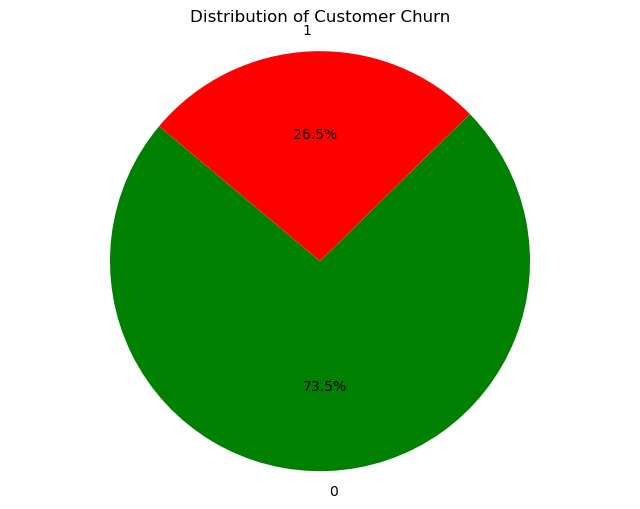

In [689]:
import matplotlib.pyplot as plt

# Plot the distribution of customer churn using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title('Distribution of Customer Churn')
plt.axis('equal') 
plt.show()


# b.  How does the customer churn distribution vary across gender in the dataset?


In [652]:
import pandas as pd

# Calculate churn count and rate for each gender
gender_churn = data.groupby('gender')['Churn'].value_counts().unstack()
gender_churn['Churn Rate'] = gender_churn['Yes'] / (gender_churn['Yes'] + gender_churn['No'])

# Print churn count and rate for each gender
print("Customer Churn Distribution Across Gender:")
print(gender_churn)



Customer Churn Distribution Across Gender:
Churn     No  Yes  Churn Rate
gender                       
Female  2549  939    0.269209
Male    2625  930    0.261603


This above code provides insights into how the customer churn distribution varies across gender by displaying the count and rate of churned and non-churned customers for each gender category and below is its visualization





# Visualize churn distribution across gender 

In [653]:


import matplotlib.pyplot as plt

plt.bar(gender_churn.index, gender_churn['Churn Rate'], color=['skyblue', 'lightcoral'])
plt.title('Customer Churn Distribution Across Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

# c. How does the customer churn distribution vary by contract type?.

In [654]:
import pandas as pd

# Calculate churn count and rate for each contract type
contract_churn = data.groupby('Contract')['Churn'].value_counts().unstack()
contract_churn['Churn Rate'] = contract_churn['Yes'] / (contract_churn['Yes'] + contract_churn['No'])

# Print churn count and rate for each contract type
print("Customer Churn Distribution by Contract Type:")
print(contract_churn)




Customer Churn Distribution by Contract Type:
Churn             No   Yes  Churn Rate
Contract                              
Month-to-month  2220  1655    0.427097
One year        1307   166    0.112695
Two year        1647    48    0.028319


This code above provides insights into how the customer churn distribution varies by contract type by displaying the count and rate of churned and non-churned customers for each contract type.Below is its visualization

# Visualize churn distribution by contract type 

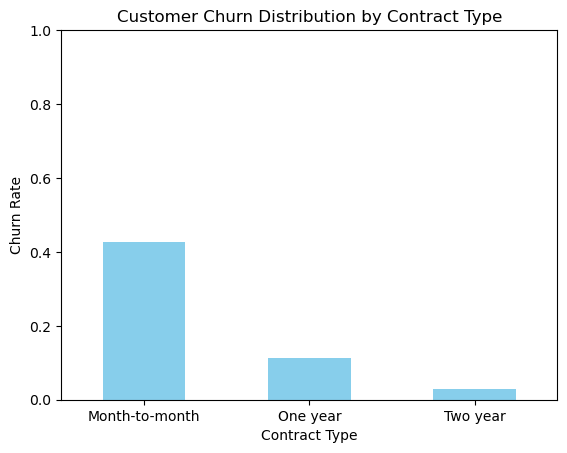

In [655]:
contract_churn['Churn Rate'].plot(kind='bar', color='skyblue')
plt.title('Customer Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

 # d. How does the customer churn distribution vary by payment method?d

In [656]:
# Calculate churn count and rate for each payment method
payment_churn = data.groupby('PaymentMethod')['Churn'].value_counts().unstack()
payment_churn['Churn Rate'] = payment_churn['Yes'] / (payment_churn['Yes'] + payment_churn['No'])

# Print churn count and rate for each payment method
print("Customer Churn Distribution by Payment Method:")
print(payment_churn)




Customer Churn Distribution by Payment Method:
Churn                        No   Yes  Churn Rate
PaymentMethod                                    
Bank transfer (automatic)  1286   258    0.167098
Credit card (automatic)    1290   232    0.152431
Electronic check           1294  1071    0.452854
Mailed check               1304   308    0.191067


This code above provides insights into how the customer churn distribution varies by payment method by displaying the count and rate of churned and non-churned customers for each payment method.Below is its visualization

# Visualize churn distribution by payment method (optional)


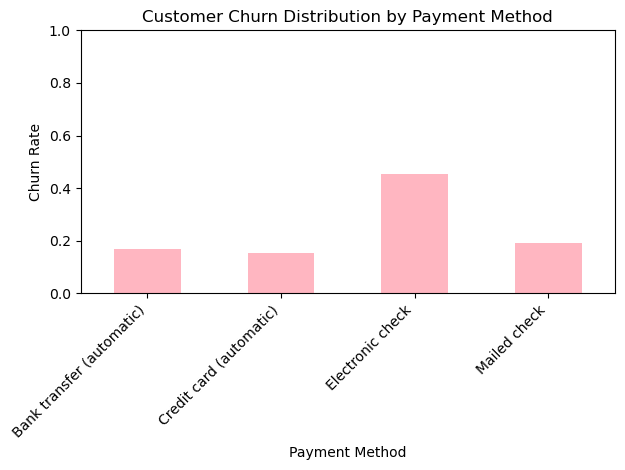

In [657]:

payment_churn['Churn Rate'].plot(kind='bar', color='lightpink')
plt.title('Customer Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# e. How does the customer churn distribution vary by internet service and gender?

In [658]:
import pandas as pd



# Calculate churn count and rate for each combination of internet service and gender
churn_distribution = data.groupby(['InternetService', 'gender'])['Churn'].value_counts().unstack()
churn_distribution['Churn Rate'] = churn_distribution['Yes'] / (churn_distribution['Yes'] + churn_distribution['No'])

# Print churn count and rate for each combination of internet service and gender
print("Customer Churn Distribution by Internet Service and Gender:")
print(churn_distribution)



Customer Churn Distribution by Internet Service and Gender:
Churn                    No  Yes  Churn Rate
InternetService gender                      
DSL             Female  969  219    0.184343
                Male    993  240    0.194647
Fiber optic     Female  889  664    0.427560
                Male    910  633    0.410240
No              Female  691   56    0.074967
                Male    722   57    0.073171


This code above provides insights into how the customer churn distribution varies based on internet service and gender by displaying the count and rate of churned and non-churned customers for each combination of internet service and gender.Below is its visualization





# Visualize churn distribution by internet service and gender


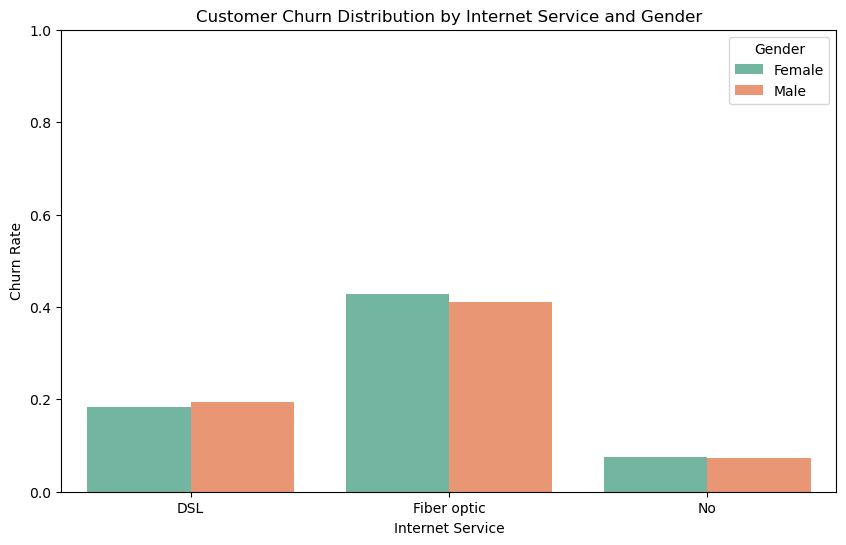

In [659]:
# Reset index for better visualization
churn_distribution.reset_index(inplace=True)

# Plot churn distribution using seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_distribution, x='InternetService', y='Churn Rate', hue='gender', palette='Set2')
plt.title('Customer Churn Distribution by Internet Service and Gender')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.show()


# f. Visualize and compare the correlation between churn rates and ’SeniorCitizen’, ’Partner’, ’Dependents’, ’tenure’, ’PhoneService’, ’PaperlessBilling’, ’MonthlyCharges’, ’TotalCharges’


In [660]:
# Convert ' ' to NaN in 'TotalCharges' column
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Convert 'Yes' and 'No' to 1 and 0 in relevant columns
data['SeniorCitizen'] = data['SeniorCitizen'].map({'Yes': 1, 'No': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Select the columns for correlation analysis
cols = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = data[cols].corr()




This code snippet standardizes the data for correlation analysis. It ensures uniformity by converting the 'TotalCharges' column to numeric data type and categorical columns to binary integers ('Yes' to 1, 'No' to 0). It then selects relevant columns, including converted variables along with 'tenure' and 'MonthlyCharges', for correlation analysis. Finally, it computes the correlation matrix to reveal relationships between churn rates and other chosen variables. This systematic approach aids in understanding the factors influencing churn rates in the dataset. Below is its Visualization

# Plot heatmap

In [661]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Between Churn Rates and Other Features')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


# QN.4

In [670]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [675]:

# Standardize the scales of 'tenure', 'MonthlyCharges', and 'TotalCharges'
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Create the output vector y
y = data['Churn']  # Target variable







This code prepares the data for correlation analysis by standardizing numerical variables, handling missing values, and creating input and output matrices required for further analysis.

# Perform classification using Logistic Regression and K-Nearest Neighbor algorithms

In [668]:
# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X, y)


LogisticRegression()

This code above initializes a logistic regression model and trains it using the preprocessed input data and corresponding output labels. After fitting, the model is ready to make predictions on new data.

In [669]:
# K-Nearest Neighbor
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)

KNeighborsClassifier()

The Knn model is trained and ready to make predictions on new data points based on their nearest neighbors in the feature space.





# 4(a)   Evaluate your models (logistic and KNN) using the following metrics [”Algorithm”, ”ROC AUC
# Mean”, ”ROC AUC STD”, ”Accuracy Mean”, ”Accuracy STD”] 

In [681]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score

In [682]:
# Define a function to evaluate models
def evaluate_model(model, X, y, cv=5):
    # Calculate ROC AUC scores using cross-validation
    roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    roc_auc_mean = roc_auc_scores.mean()
    roc_auc_std = roc_auc_scores.std()
    
    # Calculate Accuracy scores using cross-validation
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    accuracy_mean = accuracy_scores.mean()
    accuracy_std = accuracy_scores.std()
    
    return {
        "Algorithm": model.__class__.__name__,
        "ROC AUC Mean": roc_auc_mean,
        "ROC AUC STD": roc_auc_std,
        "Accuracy Mean": accuracy_mean,
        "Accuracy STD": accuracy_std
    }

# Evaluate Logistic Regression model
logistic_metrics = evaluate_model(logistic_regression_model, X, y)

# Evaluate K-Nearest Neighbor model
knn_metrics = evaluate_model(knn_model, X, y)




In [677]:
# Display the evaluation metrics
print("Evaluation Metrics for Logistic Regression:")
print(logistic_metrics)
print("\nEvaluation Metrics for K-Nearest Neighbor:")
print(knn_metrics)

Evaluation Metrics for Logistic Regression:
{'Algorithm': 'LogisticRegression', 'ROC AUC Mean': 0.8075544073736649, 'ROC AUC STD': 0.007803920605488396, 'Accuracy Mean': 0.7853205247112717, 'Accuracy STD': 0.006835763147931321}

Evaluation Metrics for K-Nearest Neighbor:
{'Algorithm': 'KNeighborsClassifier', 'ROC AUC Mean': 0.7666273195297872, 'ROC AUC STD': 0.013002273257206478, 'Accuracy Mean': 0.7763753911542681, 'Accuracy STD': 0.013742679422702603}


The code above defines a function called evaluate_model to assess machine learning models through cross-validation. It calculates ROC AUC and accuracy scores, computes their mean and standard deviation, and returns these metrics in a dictionary. Finally, it applies this function to both logistic regression and K-Nearest Neighbor models, storing the evaluation results for further analysis.